# The Power of IPython Notebook + Pandas + and Scikit-learn

IPython Notebook, Numpy, Pandas, MongoDB, R — for the better part of a year now, I have been trying out these technologies as part of Udacity's [Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002). My undergrad education barely touched on data visualization or more broadly data science, and so I figured being exposed to the aforementioned technologies would be fun. And fun it has been, with R's powerful IDE-powered data mundging and visualization techniques having been particularly revelatory. I learned enough of R to create [some complex visualizations](http://www.andreykurenkov.com/writing/fun-visualizations-of-stackoverflow/), and was impressed by how easy is to import data into its Dataframe representations and then transform and visualize that data. I also thought RStudio's paradigm of continuously intermixed code editing and execution was superior to my habitual workflow of just endlessly cycling between tweaking and executing of Python scripts.

Still, R is a not-quite-general-purpose-language and I hit upon multiple instances in which simple things were hard to do. In such times, I could not help but miss the powers of Python, a language I have tons of experience with and which is about as general purpose as it gets. Luckily, the courses also covered the equivalent of an R implementation for Python: the Python Data Analysis Library, Pandas. This let me use the features of R I now liked — dataframes, powerful plotting methods, elegant methods for transforming data — with Python's lovely syntax and libraries I already knew and loved. And soon I got to do just that, using both Pandas and the supremely good Machine Learning package Scikit-learn for the final project of [Udacity's Intro to Machine Learning Course](https://www.udacity.com/course/intro-to-machine-learning--ud120). Not only that, but I also used IPython Notebook for RStudio-esque intermixed code editing and execution and nice PDF output. 

I had such a nice experience with this combination of tools that I decided to dedicate a post to it, and what follows is mostly a summation of that experience. Reading it should be sufficient to get a general idea for why these tools are useful, whereas a much more detailed introdution and tutorial for Pandas can be found elsewhere (for instance [here](http://nbviewer.jupyter.org/github/fonnesbeck/pytenn2014_tutorial/blob/master/Part%201.%20Data%20Wrangling%20with%20Pandas.ipynb)). Incidentally, this whole post was written in IPython Notebook and the source of that [can be found here](http://www.andreykurenkov.com/writing/files/2016-06-10-power-of-ipython-pandas-scikilearn/post.ipynb) with the produced HTML [here](http://www.andreykurenkov.com/writing/files/2016-06-10-power-of-ipython-pandas-scikilearn/post.html). 

## Data Summarization
First, a bit about the project. The task was to first explore and clean a given dataset, and then train classification models using it. The dataset contained dozens of features about roughly 150 important employees from the [notoriously corrupt](https://en.wikipedia.org/wiki/Enron_scandal) company Enron, witch were classified as either a "Person of Interest" or not based on the outcome of investigations into Enron's corruption. It's a tiny dataset and not what I would have chosen, but such were the instructions. The data was provided in a bunch of Python dictionaries, and at first I just used a Python script to change it into a CSV and started exploring it in RStudio. But, it soon dawned on me that I would be much better off just working entirely in Python, and the following code is taken verbatim from my final project submission.

And so, the code. Following some imports and a '%matplotlib notebook' comment to allow plotting within IPython, I loaded the data using pickle and printed out some basic things about it (not yet using Pandas): 

In [423]:
import matplotlib.pyplot as plt
import matplotlib
import pickle
import pandas as pd 
import numpy as np
from IPython.display import display
%matplotlib notebook

In [424]:
enron_data = pickle.load(open("./ud120-projects/final_project/final_project_dataset.pkl", "rb"))

print("Number of people: %d"%len(enron_data.keys()))
print("Number of features per person: %d"%len(list(enron_data.values())[0]))
print("Number of POI: %d"%sum([1 if x['poi'] else 0 for x in enron_data.values()]))

Number of people: 146
Number of features per person: 21
Number of POI: 18


But working with this set of dictionaries would not be nearly as fast or easy as a Pandas dataframe, so I soon converted it to that and went ahead and summarized all the features with a single method call:

In [425]:
df = pd.DataFrame.from_dict(enron_data)
del df['TOTAL']
df = df.transpose()

numeric_df = df.apply(pd.to_numeric, errors='coerce')
del numeric_df['email_address']

numeric_df.describe()

bonus  deferral_payments  deferred_income  director_fees  \
count       81.000000          38.000000        48.000000      16.000000   
mean   1201773.074074      841602.526316   -581049.812500   89822.875000   
std    1441679.438330     1289322.626180    942076.402972   41112.700735   
min      70000.000000     -102500.000000  -3504386.000000    3285.000000   
25%     425000.000000       79644.500000   -611209.250000   83674.500000   
50%     750000.000000      221063.500000   -151927.000000  106164.500000   
75%    1200000.000000      867211.250000    -37926.000000  112815.000000   
max    8000000.000000     6426990.000000      -833.000000  137864.000000   

       exercised_stock_options       expenses  from_messages  \
count               101.000000      94.000000      86.000000   
mean            2959559.257426   54192.010638     608.790698   
std             5499449.598994   46108.377454    1841.033949   
min                3285.000000     148.000000      12.000000   
25%              506765.000000   22479.000000      22.750000   
50%             1297049.000000   46547.500000      41.000000   
75%             2542813.000000   78408.500000     145.500000   
max            34348384.000000  228763.000000   14368.000000   

       from_poi_to_this_person  from_this_person_to_poi    loan_advances  \
count                86.000000                86.000000         3.000000   
mean                 64.895349                41.232558  27975000.000000   
std                  86.979244               100.073111  46382560.030684   
min                   0.000000                 0.000000    400000.000000   
25%                  10.000000                 1.000000   1200000.000000   
50%                  35.000000                 8.000000   2000000.000000   
75%                  72.250000                24.750000  41762500.000000   
max                 528.000000               609.000000  81525000.000000   

       long_term_incentive            other       poi  restricted_stock  \
count            65.000000        92.000000       145        109.000000   
mean         746491.200000    465276.663043  0.124138    1147424.091743   
std          862917.421568   1389719.064851  0.330882    2249770.356903   
min           69223.000000         2.000000     False   -2604490.000000   
25%          275000.000000      1209.000000         0     252055.000000   
50%          422158.000000     51984.500000         0     441096.000000   
75%          831809.000000    357577.250000         0     985032.000000   
max         5145434.000000  10359729.000000      True   14761694.000000   

       restricted_stock_deferred          salary  shared_receipt_with_poi  \
count                  17.000000       94.000000                86.000000   
mean               621892.823529   284087.542553              1176.465116   
std               3845528.349509   177131.115377              1178.317641   
min              -1787380.000000      477.000000                 2.000000   
25%               -329825.000000   211802.000000               249.750000   
50%               -140264.000000   258741.000000               740.500000   
75%                -72419.000000   308606.500000              1888.250000   
max              15456290.000000  1111258.000000              5521.000000   

        to_messages  total_payments  total_stock_value  
count     86.000000    1.240000e+02         125.000000  
mean    2073.860465    2.623421e+06     3352073.024000  
std     2582.700981    9.488106e+06     6532883.097201  
min       57.000000    1.480000e+02      -44093.000000  
25%      541.250000    3.863802e+05      494136.000000  
50%     1211.000000    1.100246e+06     1095040.000000  
75%     2634.750000    2.084663e+06     2606763.000000  
max    15149.000000    1.035598e+08    49110078.000000

Looking through these, I found one instance of a valid outlier - Mark A. Frevert (CEO of Enron), and removed him from the dataset.

I should emphasize the benefits of doing all this in IPython Notebook. Being able to tweak parts of the code without reexecuting all of it and reloading all the data made iterating on ideas much faster, and iterating on ideas fast is essential for exploratory data analysis and development of machine learned models. It's no accident that the Matlab IDE and RStudio, both tools commonly used in the sciences for data processing and analysis, have essentially the same structure. I did not understand the benefits of IPython Notebook when I was first made to use it for class assignments in College, but now it has finally dawned on me that it fills the same role as those IDEs and became popular because it is similaly well suited for working with data.

In [426]:
del numeric_df['loan_advances']
del numeric_df['restricted_stock_deferred']
del numeric_df['director_fees']

std = numeric_df.apply(lambda x: np.abs(x - x.mean()) / x.std())
std = std.fillna(std.mean())
std.describe()

bonus  deferral_payments  deferred_income  \
count  145.000000         145.000000       145.000000   
mean     0.612134           0.670659         0.690552   
std      0.587181           0.371822         0.409188   
min      0.001230           0.001025         0.002415   
25%      0.380270           0.670659         0.611358   
50%      0.612134           0.670659         0.690552   
75%      0.612134           0.670659         0.690552   
max      4.715491           4.332032         3.103078   

       exercised_stock_options    expenses  from_messages  \
count               145.000000  145.000000     145.000000   
mean                  0.558364    0.739307       0.487468   
std                   0.689763    0.537626       0.669599   
min                   0.040311    0.005314       0.028674   
25%                   0.346078    0.510059       0.310038   
50%                   0.470558    0.739307       0.324161   
75%                   0.558364    0.817162       0.487468   
max                   5.707630    3.786101       7.473631   

       from_poi_to_this_person  from_this_person_to_poi  long_term_incentive  \
count               145.000000               145.000000           145.000000   
mean                  0.694769                 0.532234             0.670577   
std                   0.549542                 0.648923             0.491393   
min                   0.010294                 0.032302             0.027083   
25%                   0.481671                 0.342075             0.546392   
50%                   0.694769                 0.412024             0.670577   
75%                   0.694769                 0.532234             0.670577   
max                   5.324312                 5.673526             5.097756   

            other         poi  restricted_stock      salary  \
count  145.000000  145.000000        145.000000  145.000000   
mean     0.444004    0.657200          0.525893    0.568830   
std      0.711333    0.751724          0.735294    0.659254   
min      0.000058    0.375173          0.044846    0.025148   
25%      0.297679    0.375173          0.302841    0.250755   
50%      0.334411    0.375173          0.417338    0.568830   
75%      0.444004    0.375173          0.525893    0.568830   
max      7.119750    2.647054          6.051404    4.669820   

       shared_receipt_with_poi  to_messages  total_payments  total_stock_value  
count               145.000000   145.000000      145.000000         145.000000  
mean                  0.794256     0.648079        0.287221           0.547885  
std                   0.462087     0.582615        0.884946           0.774945  
min                   0.037736     0.041484        0.003077           0.014143  
25%                   0.605495     0.455283        0.130231           0.296228  
50%                   0.794256     0.648079        0.196170           0.423551  
75%                   0.847365     0.648079        0.271301           0.508700  
max                   3.687066     5.062584       10.638201           7.004259

This result suggested that most features have large outliers (larger than 3 standard deviations). In order to be careful not to remove any useful data, I manually inspected all rows with large outliers to see any values that seem appropriate for removal:

In [427]:
outliers = std.apply(lambda x: x > 5).any(axis=1)
outlier_df = pd.DataFrame(index=numeric_df[outliers].index)
for col in numeric_df.columns:
    outlier_df[str((col,col+'_std'))] = list(zip(numeric_df[outliers][col],std[outliers][col]))
display(outlier_df)
numeric_df.drop('FREVERT MARK A',inplace=True)
df.drop('FREVERT MARK A',inplace=True)

('bonus', 'bonus_std')  \
DELAINEY DAVID W      (3000000.0, 1.24731398542)   
FREVERT MARK A       (2000000.0, 0.553678511813)   
HIRKO JOSEPH               (nan, 0.612134343218)   
KAMINSKI WINCENTY J   (400000.0, 0.556138245963)   
LAVORATO JOHN J       (8000000.0, 4.71549135347)   
LAY KENNETH L         (7000000.0, 4.02185587986)   
MARTIN AMANDA K            (nan, 0.612134343218)   
SHAPIRO RICHARD S     (650000.0, 0.382729377561)   
WHITE JR THOMAS E     (450000.0, 0.521456472283)   

                    ('deferral_payments', 'deferral_payments_std')  \
DELAINEY DAVID W                              (nan, 0.67065886001)   
FREVERT MARK A                          (6426990.0, 4.33203246439)   
HIRKO JOSEPH                             (10259.0, 0.644790923106)   
KAMINSKI WINCENTY J                           (nan, 0.67065886001)   
LAVORATO JOHN J                               (nan, 0.67065886001)   
LAY KENNETH L                           (202911.0, 0.495369827029)   
MARTIN AMANDA K                          (85430.0, 0.586488215565)   
SHAPIRO RICHARD S                             (nan, 0.67065886001)   
WHITE JR THOMAS E                             (nan, 0.67065886001)   

                    ('deferred_income', 'deferred_income_std')  \
DELAINEY DAVID W                         (nan, 0.690552246623)   
FREVERT MARK A                     (-3367011.0, 2.95725609803)   
HIRKO JOSEPH                             (nan, 0.690552246623)   
KAMINSKI WINCENTY J                      (nan, 0.690552246623)   
LAVORATO JOHN J                          (nan, 0.690552246623)   
LAY KENNETH L                       (-300000.0, 0.29833016899)   
MARTIN AMANDA K                          (nan, 0.690552246623)   
SHAPIRO RICHARD S                        (nan, 0.690552246623)   
WHITE JR THOMAS E                        (nan, 0.690552246623)   

                    ('exercised_stock_options', 'exercised_stock_options_std')  \
DELAINEY DAVID W                           (2291113.0, 0.121547846815)           
FREVERT MARK A                             (10433518.0, 1.35903759241)           
HIRKO JOSEPH                               (30766064.0, 5.05623412708)           
KAMINSKI WINCENTY J                         (850010.0, 0.383592797689)           
LAVORATO JOHN J                             (4158995.0, 0.21810105193)           
LAY KENNETH L                              (34348384.0, 5.70763022327)           
MARTIN AMANDA K                             (2070306.0, 0.16169859209)           
SHAPIRO RICHARD S                           (607837.0, 0.427628659031)           
WHITE JR THOMAS E                          (1297049.0, 0.302304844785)           

                    ('expenses', 'expenses_std')  \
DELAINEY DAVID W         (86174.0, 0.6936264325)   
FREVERT MARK A         (86987.0, 0.711258803121)   
HIRKO JOSEPH           (77978.0, 0.515871316129)   
KAMINSKI WINCENTY J    (83585.0, 0.637476115725)   
LAVORATO JOHN J        (49537.0, 0.100958023148)   
LAY KENNETH L           (99832.0, 0.98984158372)   
MARTIN AMANDA K         (8211.0, 0.997237664333)   
SHAPIRO RICHARD S      (137767.0, 1.81257710587)   
WHITE JR THOMAS E       (81353.0, 0.58906842664)   

                    ('from_messages', 'from_messages_std')  \
DELAINEY DAVID W                    (3069.0, 1.3363193564)   
FREVERT MARK A                      (21.0, 0.319272057897)   
HIRKO JOSEPH                         (nan, 0.487467982744)   
KAMINSKI WINCENTY J               (14368.0, 7.47363149225)   
LAVORATO JOHN J                    (2585.0, 1.07342360688)   
LAY KENNETH L                       (36.0, 0.311124462355)   
MARTIN AMANDA K                    (230.0, 0.205748893335)   
SHAPIRO RICHARD S                 (1215.0, 0.329276547308)   
WHITE JR THOMAS E                    (nan, 0.487467982744)   

                    ('from_poi_to_this_person', 'from_poi_to_this_person_std')  \
DELAINEY DAVID W                               (66.0, 0.0127001697143)           
FREVERT MARK A  

Looking through these, I found one instance of a valid outlier - Mark A. Frevert (CEO of Enron), and removed him from the dataset.

I should emphasize the benefits of doing all this in IPython Notebook. Being able to tweak parts of the code without reexecuting all of it and reloading all the data made iterating on ideas much faster, and iterating on ideas fast is essential for exploratory data analysis and development of machine learned models. It's no accident that the Matlab IDE and RStudio, both tools commonly used in the sciences for data processing and analysis, have essentially the same structure. I did not understand the benefits of IPython Notebook when I was first made to use it for class assignments in College, but now it has finally dawned on me that it fills the same role as those IDEs and became popular because it is similaly well suited for working with data.

## Feature Visualization, Engineering and Selection
The project also instructed me to choose a set of features, and to engineer some of my own. In order to get an initial idea of possible promising features and how I could use them to create new features, I computed the correlation of each feature to the Person of Interest classification:

In [428]:
corr = numeric_df.corr()
print('\nCorrelations between features to POI:\n ' +str(corr['poi']))


Correlations between features to POI:
 bonus                      0.306907
deferral_payments         -0.075632
deferred_income           -0.334810
exercised_stock_options    0.513724
expenses                   0.064293
from_messages             -0.076108
from_poi_to_this_person    0.183128
from_this_person_to_poi    0.111313
long_term_incentive        0.264894
other                      0.174291
poi                        1.000000
restricted_stock           0.232410
salary                     0.323374
shared_receipt_with_poi    0.239932
to_messages                0.061531
total_payments             0.238375
total_stock_value          0.377033
Name: poi, dtype: float64


The results indicated that 'exercised_stock_options', 'total_stock_value', and 'bonus' are the most promising features. Just for fun, I went ahead and plotted these features to see if I could visually verify their significance:

<IPython.core.display.Javascript object>


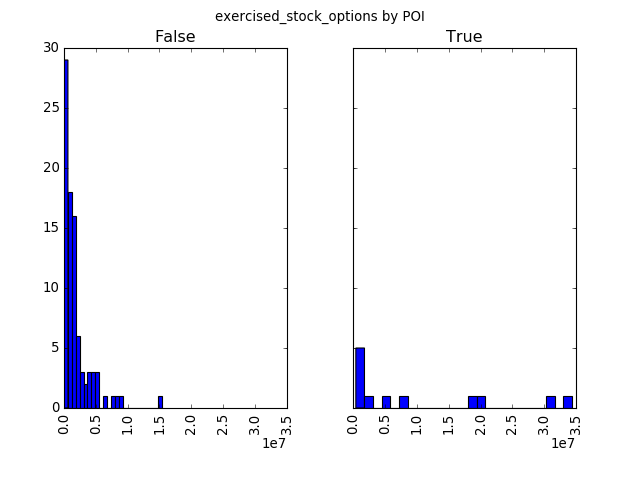

In [429]:
numeric_df.hist(column='exercised_stock_options',by='poi',bins=25,sharex=True,sharey=True)
plt.suptitle("exercised_stock_options by POI")

<IPython.core.display.Javascript object>


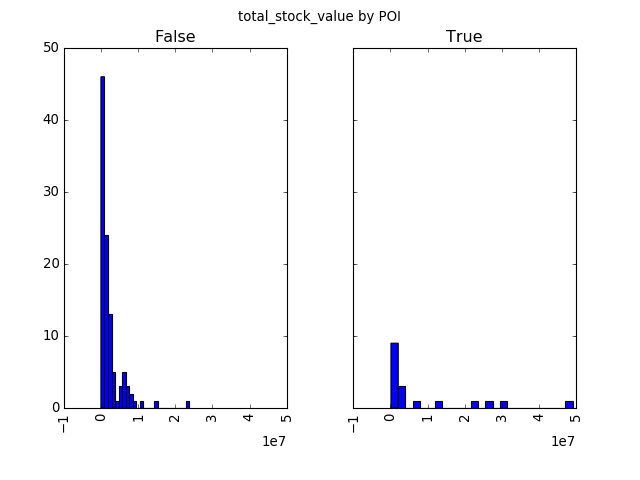

In [430]:
numeric_df.hist(column='total_stock_value',by='poi',bins=25,sharex=True,sharey=True)
plt.suptitle("total_stock_value by POI")

<IPython.core.display.Javascript object>


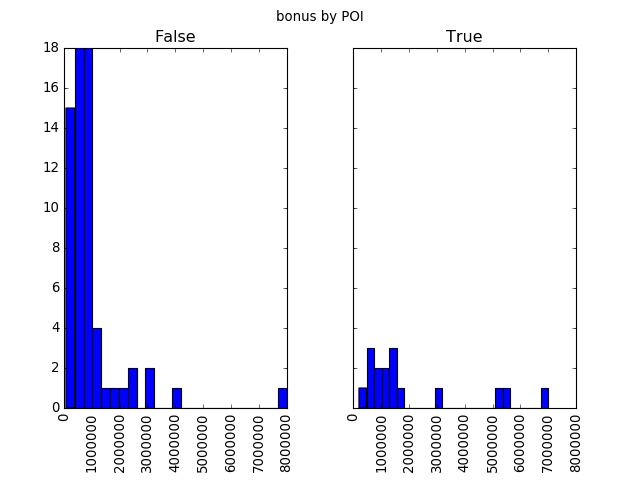

In [431]:
numeric_df.hist(column='bonus',by='poi',bins=25,sharex=True,sharey=True)
plt.suptitle("bonus by POI")

As well as one that is not strongly correlated:

<IPython.core.display.Javascript object>


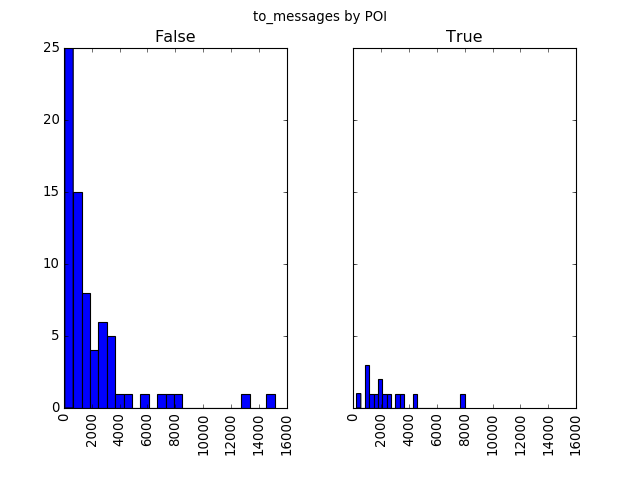

In [432]:
numeric_df.hist(column='to_messages',by='poi',bins=25,sharex=True,sharey=True)
plt.suptitle("to_messages by POI")

The data and plots above indicated that the exercised_stock_options, total_stock_value, and restricted_stock, and to a lesser extent to payment related information (total_payments, salary, bonus, and expenses), are all correlated to Persons of Interest. Therefore, I created new features as sums and ratios of these ones. Working with Pandas made this incredibely easy due to vectorized operations, and though Numpy could similarly make this easy I think Pandas' Dataframe construct makes it especially easy.

It was also easy to fix any problems with the data before starting to train machine learning models. In order to use the data for evaluation and training, I replaced null values with the mean of each feature so as to be able to use the dataset with Scikit-learn. I also scaled all features to a range of 1-0, to better work with Support Vector Machines:

In [433]:
#Get rid of label
del numeric_df['poi']
poi = df['poi']

#Create new features
numeric_df['stock_sum'] = numeric_df['exercised_stock_options'] +\
                           numeric_df['total_stock_value'] +\
                           numeric_df['restricted_stock'] 
numeric_df['stock_ratio'] = numeric_df['exercised_stock_options']/numeric_df['total_stock_value']
numeric_df['money_total'] = numeric_df['salary'] +\
                             numeric_df['bonus'] -\
                             numeric_df['expenses']
numeric_df['money_ratio'] = numeric_df['bonus']/numeric_df['salary'] 
numeric_df['email_ratio'] = numeric_df['from_messages']/(numeric_df['to_messages']+numeric_df['from_messages'])
numeric_df['poi_email_ratio_from'] = numeric_df['from_poi_to_this_person']/numeric_df['to_messages']
numeric_df['poi_email_ratio_to'] = numeric_df['from_this_person_to_poi']/numeric_df['from_messages']

#Feel in NA values with 'marker' value outside range of real values
numeric_df = numeric_df.fillna(numeric_df.mean())

#Scale to 1-0
numeric_df = (numeric_df-numeric_df.min())/(numeric_df.max()-numeric_df.min())

Then, I scored features using Scikit-learn's SelectKBest to get an ordering of them to test with multiple algorithms afterward. Pandas Dataframes can be used directly with Scikit-learn, which is another great benefit of it:

In [434]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest()
selector.fit(numeric_df,poi.tolist())
scores = {numeric_df.columns[i]:selector.scores_[i] for i in range(len(numeric_df.columns))}
sorted_features = sorted(scores,key=scores.get, reverse=True)
for feature in sorted_features:
    print('Feature %s has value %f'%(feature,scores[feature]))

Feature exercised_stock_options has value 30.528310
Feature total_stock_value has value 22.901164
Feature stock_sum has value 16.090150
Feature salary has value 14.428640
Feature poi_email_ratio_to has value 13.619580
Feature bonus has value 11.771121
Feature money_total has value 11.005135
Feature deferred_income has value 9.058555
Feature total_payments has value 8.334006
Feature restricted_stock has value 7.335986
Feature long_term_incentive has value 6.448285
Feature shared_receipt_with_poi has value 6.340473
Feature other has value 4.067974
Feature money_ratio has value 3.781568
Feature from_poi_to_this_person has value 3.626045
Feature email_ratio has value 2.176411
Feature from_this_person_to_poi has value 1.318493
Feature poi_email_ratio_from has value 1.279491
Feature from_messages has value 0.613342
Feature expenses has value 0.543049
Feature to_messages has value 0.400295
Feature deferral_payments has value 0.223368
Feature stock_ratio has value 0.013109


It appeared that several of my features are among the most useful, as 'poi_email_ratio_to', 'stock_sum', and 'money_total' are all ranked highly. But, since the data is so small I had no need to get rid of any of the features and went ahead with testing several classifiers with several sets of features.

# Training and Evaluating Models
Proceding with the project, I selected three algorithms to test and compare: Naive Bayes, Decision Trees, and Support Vector Machines. Naive Bayes is a good baseline for any ML task, and the other two fit well into the task of binary classification with many features and can both be automatically tuned using sklearn classes. A word on SkLearn: it is simply a very well designed Machine Learning toolkit, with great compatibility with Numpy (and therefore also Pandas) and an elegant and smart API structure that makes trying out different models and evaluating features and just about anything one might want short of Deep Learning easy.

I think the code that follows will attest to that. I tested those three algorithms with a variable number of features, from one to all of them ordered by the SelectKBest scoring. Because the data is so small, I could afford an extensive validation scheme and did multiple random splits of the data into training and testing to get an average that best indicated the strength of each algorithm. I also went ahead and evaluated precision and recall besides accuracy, since those were to be the metric of performance. And all it took to do all that is maybe 50 lines of code:

In [476]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.grid_search import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.cross_validation import StratifiedShuffleSplit
import scipy
import warnings
warnings.filterwarnings('ignore')

gnb_clf = GridSearchCV(GaussianNB(),{})
#No params to tune for for linear bayes, use for convenience
        
svc_clf = SVC()
svc_search_params = {'C': scipy.stats.expon(scale=1), 
                     'gamma': scipy.stats.expon(scale=.1),
                     'kernel': ['linear','poly','rbf'],
                     'class_weight':['balanced',None]}
svc_search = RandomizedSearchCV(svc_clf, 
                                param_distributions=svc_search_params, 
                                n_iter=25)

tree_clf = DecisionTreeClassifier()
tree_search_params = {'criterion':['gini','entropy'],
                     'max_leaf_nodes':[None,25,50,100,1000],
                     'min_samples_split':[2,3,4],
                     'max_features':[0.25,0.5,0.75,1.0]}
tree_search = GridSearchCV(tree_clf, 
                           tree_search_params,
                           scoring='recall')

search_methods = [gnb_clf,svc_search,tree_search]
average_accuracies = [[0],[0],[0]]
average_precision = [[0],[0],[0]]
average_recall = [[0],[0],[0]]

num_splits = 10
train_split = 0.9
indices = list(StratifiedShuffleSplit(poi.tolist(),
                                      num_splits,
                                      test_size=1-train_split, 
                                      random_state=0))

best_features = None
max_score = 0
best_classifier = None
num_features = 0
for num_features in range(1,len(sorted_features)+1):
    features = sorted_features[:num_features]
    feature_df = numeric_df[features]
    for classifier_idx in range(3): 
        sum_values = [0,0,0]
        #Only do parameter search once, too wasteful to do a ton
        search_methods[classifier_idx].fit(feature_df.iloc[indices[0][0],:],
                                           poi[indices[0][0]].tolist())
        classifier = search_methods[classifier_idx].best_estimator_
        for split_idx in range(num_splits): 
            train_indices, test_indices = indices[split_idx]
            train_data = (feature_df.iloc[train_indices,:],poi[train_indices].tolist())
            test_data = (feature_df.iloc[test_indices,:],poi[test_indices].tolist())
            classifier.fit(train_data[0],train_data[1])
            predicted = classifier.predict(test_data[0])
            sum_values[0]+=accuracy_score(predicted,test_data[1])
            sum_values[1]+=precision_score(predicted,test_data[1])
            sum_values[2]+=recall_score(predicted,test_data[1])
        avg_acc,avg_prs,avg_recall = [val/num_splits for val in sum_values]
        average_accuracies[classifier_idx].append(avg_acc)
        average_precision[classifier_idx].append(avg_prs)
        average_recall[classifier_idx].append(avg_recall)
        
        score = (avg_prs+avg_recall)/2
        if score>max_score and avg_prs>0.3 and avg_recall>0.3:
            max_score = score
            best_features = features
            best_classifier = search_methods[classifier_idx].best_estimator_
print('Best classifier found is %s \n\
       with score (recall+precision)/2 of %f\n\
       and feature set %s'%(str(best_classifier),max_score,best_features))

Best classifier found is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=0.25, max_leaf_nodes=25, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') 
       with score (recall+precision)/2 of 0.370000
       and feature set ['exercised_stock_options', 'total_stock_value', 'stock_sum', 'salary', 'poi_email_ratio_to', 'bonus']


Then, I could go right back to Pandas to plot the results. Sure, I could do this with matplotlib just as well, but the flexibility and simplicity of the 'plot' function call on a DataFrame makes it much less annoying to use in my opinion.

<IPython.core.display.Javascript object>


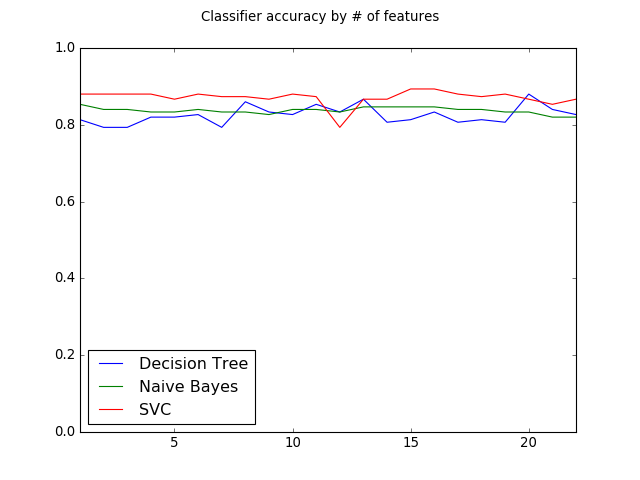

In [477]:
results = pd.DataFrame.from_dict({'Naive Bayes': average_accuracies[0],
                                  'SVC':average_accuracies[1],
                                  'Decision Tree':average_accuracies[2]})
results.plot(xlim=(1,len(sorted_features)-1),ylim=(0,1))
plt.suptitle("Classifier accuracy by # of features")

<IPython.core.display.Javascript object>


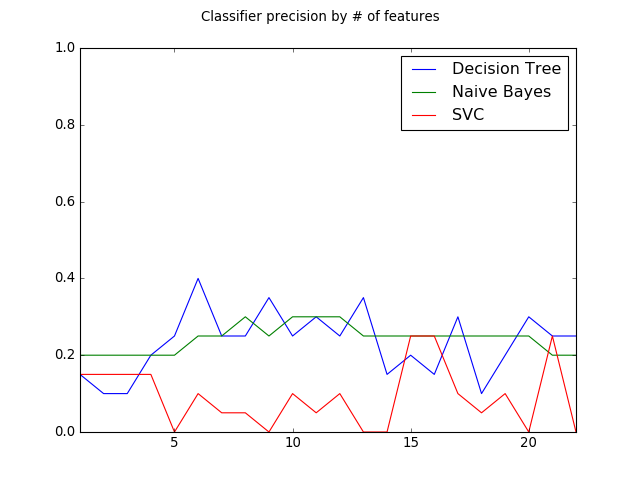

In [478]:
results = pd.DataFrame.from_dict({'Naive Bayes': average_precision[0],
                                  'SVC':average_precision[1],
                                  'Decision Tree':average_precision[2]})
results.plot(xlim=(1,len(sorted_features)-1),ylim=(0,1))
plt.suptitle("Classifier precision by # of features")

<IPython.core.display.Javascript object>


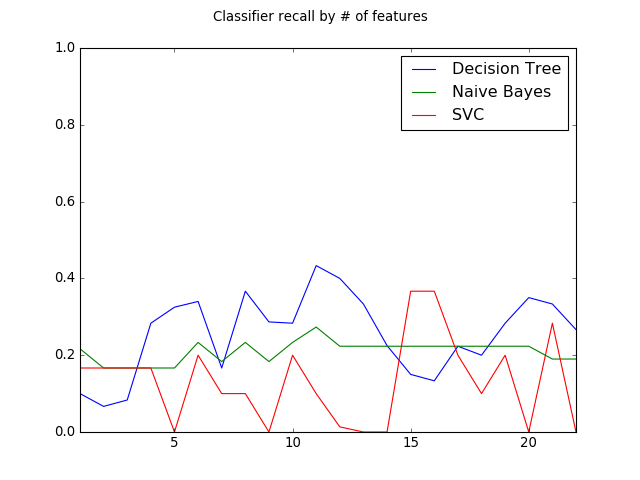

In [479]:
results = pd.DataFrame.from_dict({'Naive Bayes': average_recall[0],
                                  'SVC':average_recall[1],
                                  'Decision Tree':average_recall[2]})
results.plot(xlim=(1,len(sorted_features)-1),ylim=(0,1))
plt.suptitle("Classifier recall by # of features")

As output by my code, the best algorithm was consistently found to be Decision Trees and so I could finally finish up the project by submitting that as my model.

## Conclusion
I did not much care for the project's dataset and overall structure, but I still greatly enjoyed completing it because of how fun it was to combine Pandas data processing with Scikit-learn model training in the process, with IPython Notebook making that process even more fluid. While not at all a well written introduction or tutorial for these packages, I do hope that this write up about a single project I finished using them might inspire some readers to try out doing that as well. 